<a href="https://colab.research.google.com/github/mandavi-singh/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
sentiment = pd.read_csv("/content/3) Sentiment dataset.csv")

In [ ]:
sentiment.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
sentiment.shape

(732, 15)

In [ ]:
sentiment.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
sentiment.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
sentiment.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
data = sentiment[['Text','Sentiment']].dropna()


In [ ]:
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [ ]:
data['label'] = data['Sentiment'].apply(
    lambda x: 1 if x.strip().lower() == "positive" else 0
)


In [ ]:
data

,Text,Sentiment,label
0,Enjoying a beautiful day at the park! ...,Positive,1
1,Traffic was terrible this morning. ...,Negative,0
2,Just finished an amazing workout! 💪 ...,Positive,1
3,Excited about the upcoming weekend getaway! ...,Positive,1
4,Trying out a new recipe for dinner tonight. ...,Neutral,0
...,...,...,...
727,Collaborating on a science project that receiv...,Happy,0
728,Attending a surprise birthday party organized ...,Happy,0
729,Successfully fundraising for a school charity ...,Happy,0
730,"Participating in a multicultural festival, cel...",Happy,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data['Text'], data['label'], test_size=0.2, random_state=42
)

vec = CountVectorizer(stop_words='english')
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)


In [ ]:
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4639 stored elements and shape (585, 2116)>

In [ ]:
X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 838 stored elements and shape (147, 2116)>

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_vec, Y_train)

Y_pred = logreg.predict(X_test_vec)
Y_prob = logreg.predict_proba(X_test_vec)[:,1]

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, Y_prob))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9387755102040817
Precision: 0.0
Recall: 0.0
ROC-AUC: 0.8558776167471819

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       138
           1       0.00      0.00      0.00         9

    accuracy                           0.94       147
   macro avg       0.47      0.50      0.48       147
weighted avg       0.88      0.94      0.91       147



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

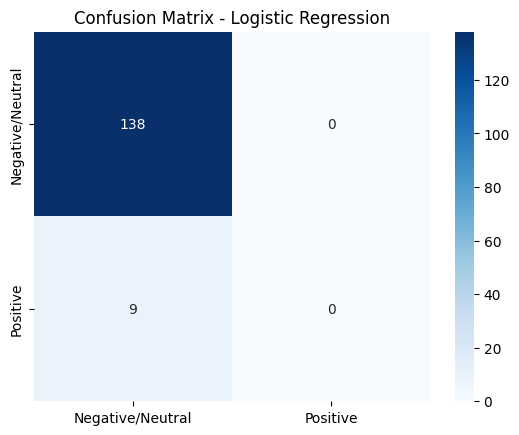

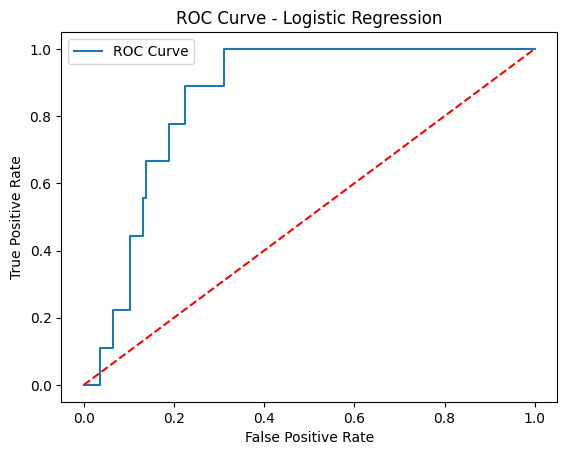

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative/Neutral","Positive"],
            yticklabels=["Negative/Neutral","Positive"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


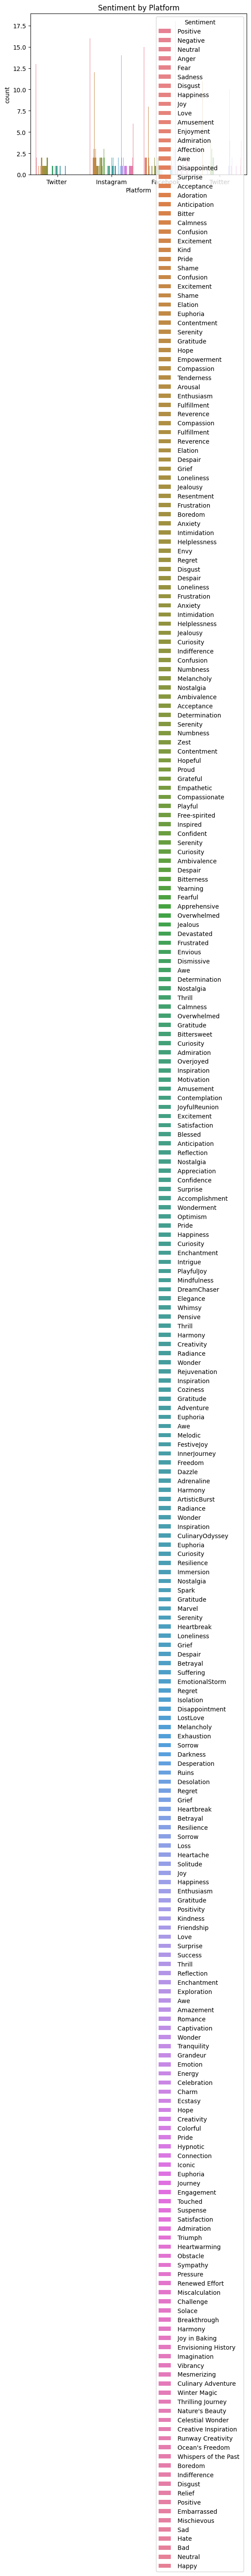

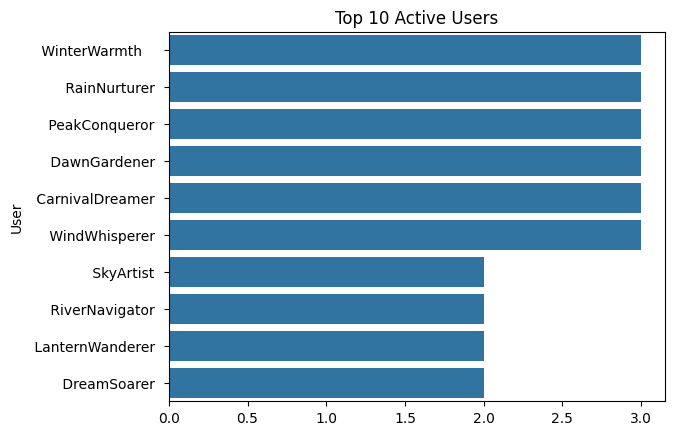

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Platform distribution
sns.countplot(data=sentiment, x="Platform", hue="Sentiment")
plt.title("Sentiment by Platform")
plt.show()

# Top active users
top_users = sentiment['User'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index)
plt.title("Top 10 Active Users")
plt.show()


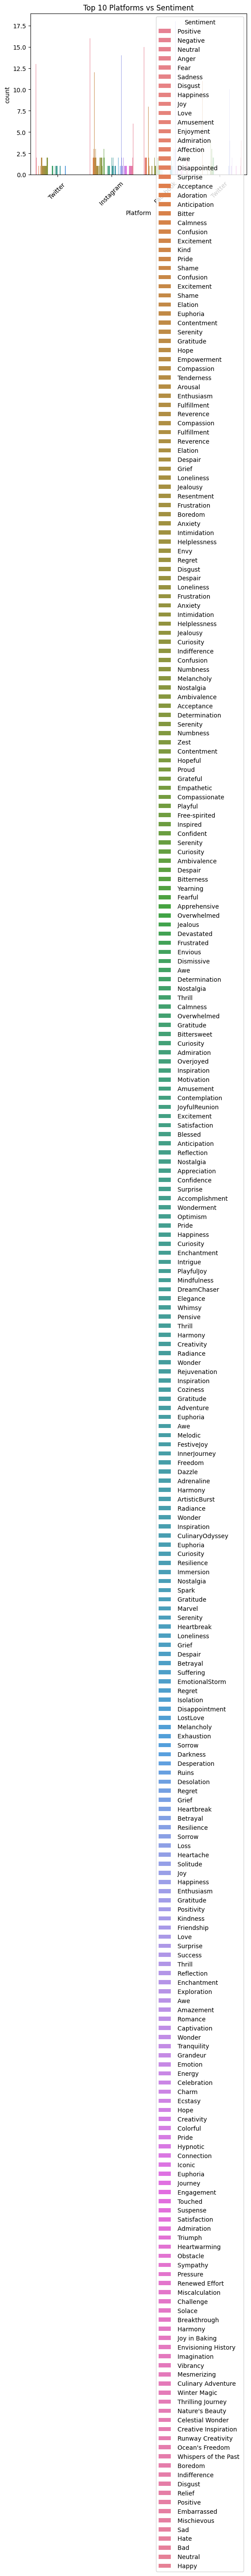

In [ ]:
top_platforms = sentiment['Platform'].value_counts().head(10).index

# Filter only those rows
filtered = sentiment[sentiment['Platform'].isin(top_platforms)]

# Plot
sns.countplot(x="Platform", hue="Sentiment", data=filtered)
plt.title("Top 10 Platforms vs Sentiment")
plt.xticks(rotation=45)
plt.show()

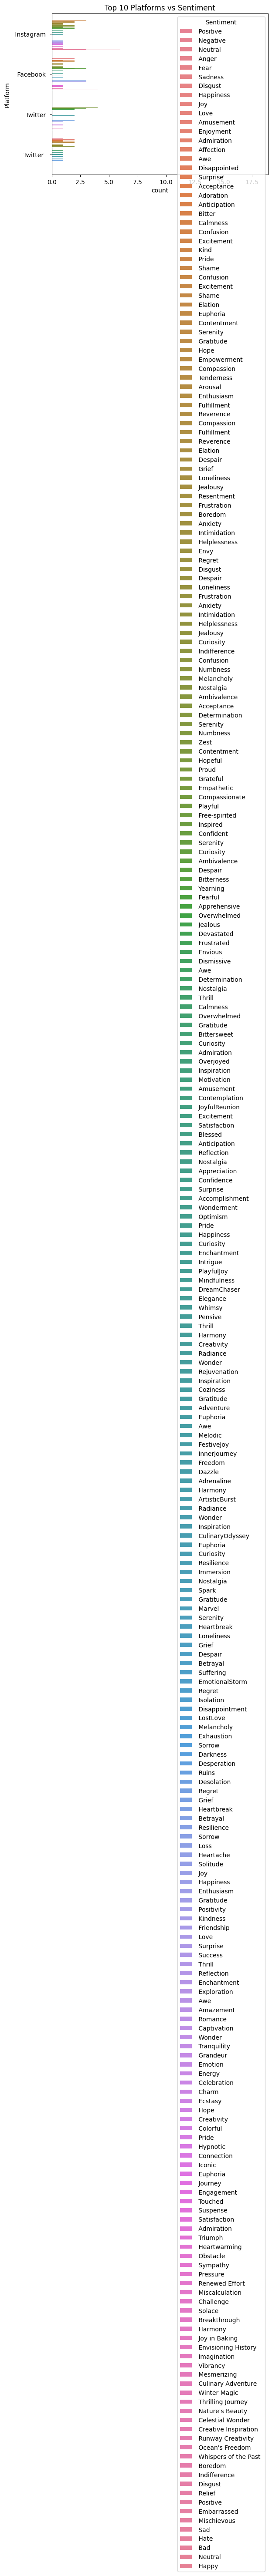

In [ ]:
# Top 10 platforms
top_platforms = sentiment['Platform'].value_counts().head(10).index

# Filter dataset
filtered = sentiment[sentiment['Platform'].isin(top_platforms)]

# Horizontal barplot
sns.countplot(y="Platform", hue="Sentiment", data=filtered, order=top_platforms)
plt.title("Top 10 Platforms vs Sentiment")
plt.show()


In [ ]:
# Vectorization
vec = CountVectorizer(stop_words='english')
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, Y_train)

# Accuracy
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.9387755102040817


In [ ]:
import pickle

with open("sentiment_model.pkl","wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl","wb") as f:
    pickle.dump(vec, f)


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 835.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
